<a href="https://colab.research.google.com/github/gs1charancharan/masai/blob/main/Healthcare_Diabetes_EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [ ]:
#Data Quality Check
#missing values, duplicates

print(f"Missing Values:, {df.isnull().sum()}")
print(f"Duplicate Rows:, {df.duplicated().sum()}")
print(f"Target Distribution:{df['diabetes'].value_counts()}")
print(f"\nTarget Balance: {(df['diabetes'].value_counts(normalize=True) * 100).round(2).to_dict()}")

Missing Values:, gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
Duplicate Rows:, 3854
Target Distribution:diabetes
0    91500
1     8500
Name: count, dtype: int64

Target Balance: {0: 91.5, 1: 8.5}


In [ ]:
#staistical Summary

df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
df['gender'].unique()
df['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [ ]:
print("="*60 + "\n Feature Cardinality Test Beings : \n" + "="*60)

for column in df.columns:
  num_distinct = len(df[column].unique())
  feature_type = "Categorical" if num_distinct < 10 else " Numerical"
  print(f"{column:20s} | {num_distinct:6,} unique values | {feature_type}")

 Feature Cardinality Test Beings : 
gender               |      3 unique values | Categorical
age                  |    102 unique values |  Numerical
hypertension         |      2 unique values | Categorical
heart_disease        |      2 unique values | Categorical
smoking_history      |      6 unique values | Categorical
bmi                  |  4,247 unique values |  Numerical
HbA1c_level          |     18 unique values |  Numerical
blood_glucose_level  |     18 unique values |  Numerical
diabetes             |      2 unique values | Categorical


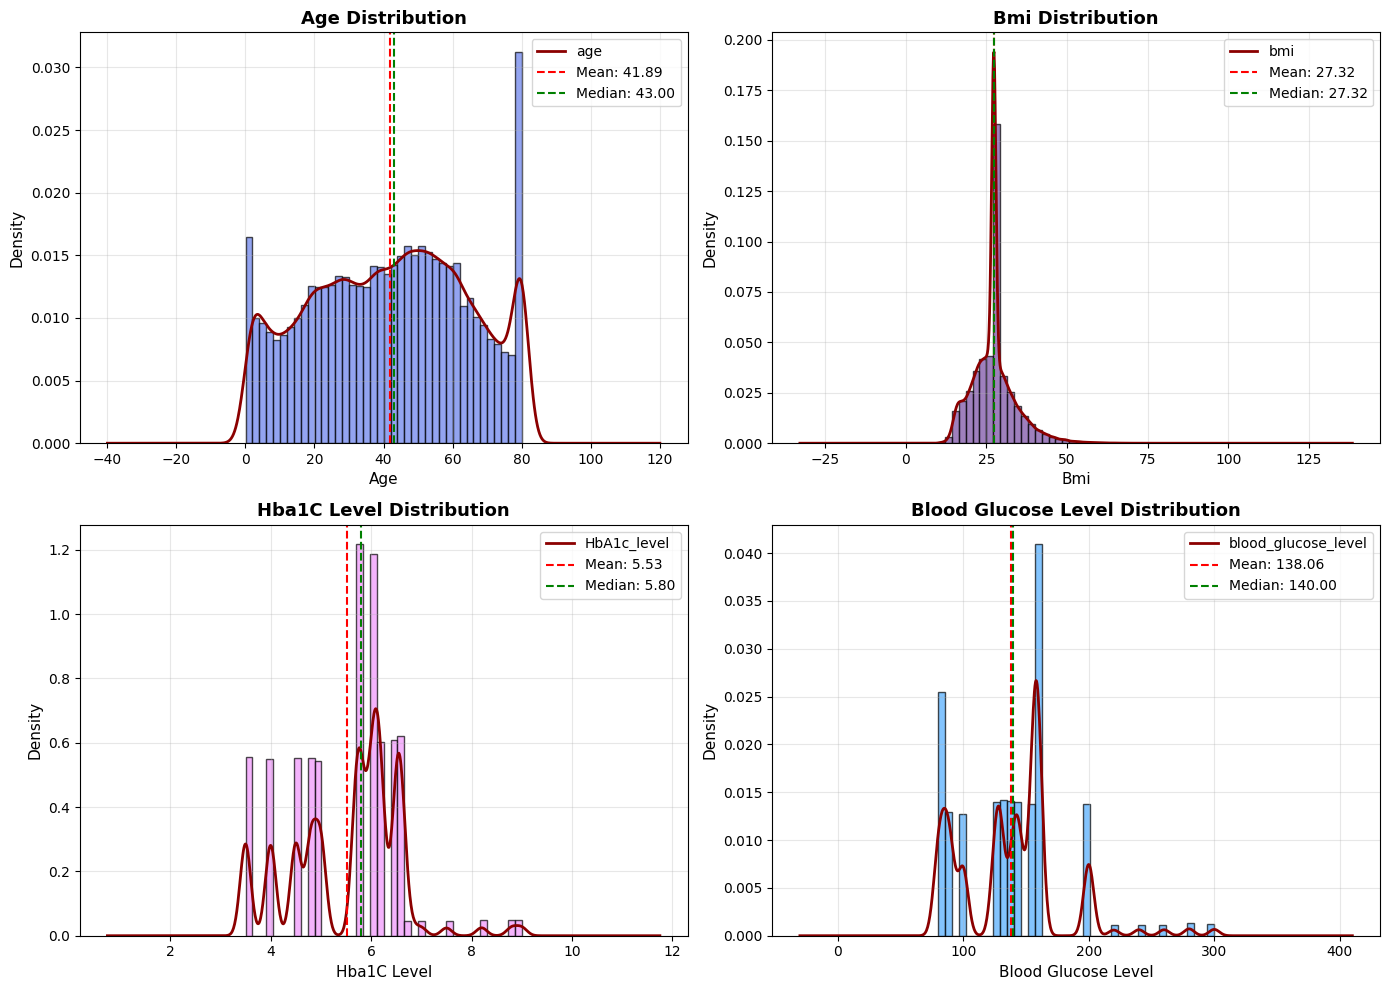

In [ ]:
#univariate Analysis

import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
numeric_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
colors = ['#667eea', '#764ba2', '#f093fb', '#4facfe']

for idx, (feature, color) in enumerate(zip(numeric_features, colors)):
    ax = axes[idx // 2, idx % 2]

    # Histogram with KDE
    ax.hist(df[feature], bins=40, color=color, alpha=0.7, edgecolor='black', density=True)
    df[feature].plot(kind='kde', ax=ax, color='darkred', linewidth=2)

    # Styling
    ax.set_title(f'{feature.replace("_", " ").title()} Distribution', fontsize=13, fontweight='bold')
    ax.set_xlabel(feature.replace("_", " ").title(), fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.grid(alpha=0.3)

    #add statsics
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=1.5, label=f'Median: {median_val:.2f}')
    ax.legend()

plt.tight_layout()
plt.show()

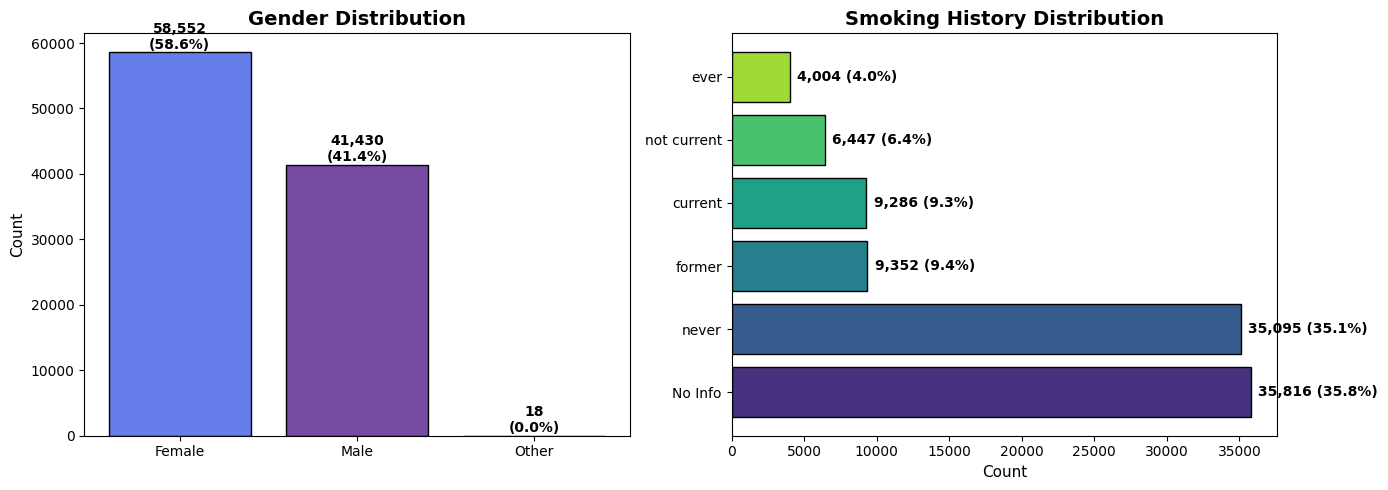

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))



# Gender Distribution
gender_counts = df['gender'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values, color=['#667eea', '#764ba2', '#f093fb'], edgecolor='black')
axes[0].set_title('Gender Distribution', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=11)
for i, v in enumerate(gender_counts.values):
    axes[0].text(i, v + 500, f'{v:,}\n({v/len(df)*100:.1f}%)', ha='center', fontweight='bold')



# Smoking History Distribution
smoking_counts = df['smoking_history'].value_counts()
axes[1].barh(smoking_counts.index, smoking_counts.values, color=sns.color_palette('viridis', len(smoking_counts)), edgecolor='black')
axes[1].set_title('Smoking History Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Count', fontsize=11)
for i, v in enumerate(smoking_counts.values):
    axes[1].text(v + 500, i, f'{v:,} ({v/len(df)*100:.1f}%)', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

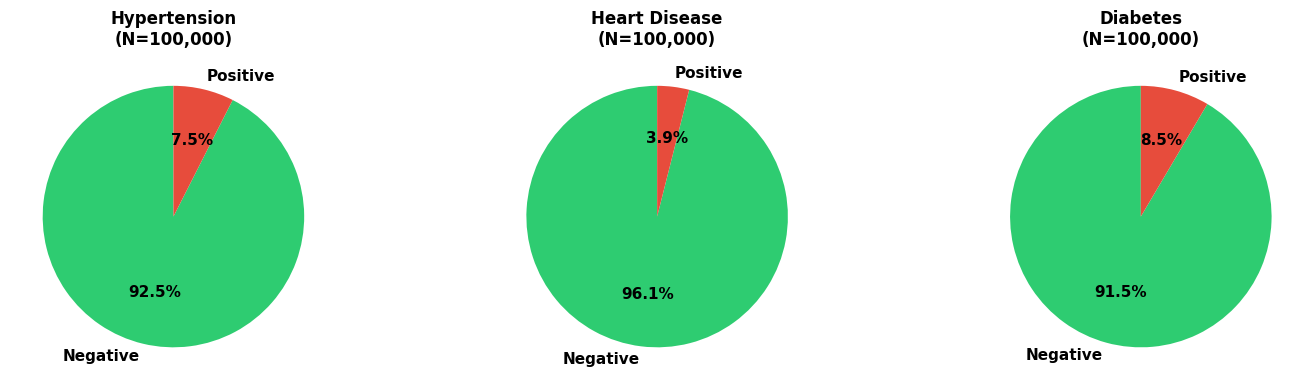

 Binary Feature Statistics:

hypertension         | Positive:  7,485 ( 7.49%) | Negative: 92,515 (92.52%)
heart_disease        | Positive:  3,942 ( 3.94%) | Negative: 96,058 (96.06%)
diabetes             | Positive:  8,500 ( 8.50%) | Negative: 91,500 (91.50%)


In [ ]:
binary_features = ['hypertension', 'heart_disease', 'diabetes']
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, feature in enumerate(binary_features):
    counts = df[feature].value_counts()
    colors = ['#2ecc71', '#e74c3c']

    axes[idx].pie(counts, labels=['Negative', 'Positive'], autopct='%1.1f%%',
                  colors=colors, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
    axes[idx].set_title(f'{feature.replace("_", " ").title()}\n(N={len(df):,})',
                        fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Print statistics
print(" Binary Feature Statistics:\n")

for feature in binary_features:
    positive = df[feature].sum()
    total = len(df)
    print(f"{feature:20s} | Positive: {positive:6,} ({positive/total*100:5.2f}%) | Negative: {total-positive:6,} ({(total-positive)/total*100:5.2f}%)")